# SVR

In [ ]:
# Import file handling
import joblib

# Import numerical and dataframe handling
import numpy as np
import pandas as pd

# Import plotting functionality
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn data utilities
from sklearn.model_selection import train_test_split

# Model scoring
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Import svm
from sklearn import svm
from sklearn.svm import SVR

# 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

## Data

In [ ]:
data = pd.read_csv('../data/parkinsons_updrs.data')

In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()

X_cols=['age','Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'HNR']
sX_cols = ['age', 'DFA', 'Jitter(Abs)', 'PPE', 'HNR', 'RPDE', 'Shimmer:APQ11', 'Shimmer:APQ3', 'Shimmer:DDA']
y_cols=['motor_UPDRS', 'total_UPDRS']

X = sc_X.fit_transform(data[X_cols])
y = sc_y.fit_transform(data[y_cols])

seed = 0
test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=seed)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3760, 13) (3760, 2)
(940, 13) (940, 2)


## Model

In [ ]:
regressor = SVR(kernel='rbf', gamma=0.6)

## Testing

In [ ]:
def get_metrics(regressor, target, X_train, y_train, X_test, y_test):
    regressor.fit(X_train, y_train[:, target]) # 0: motor, 1: total

    if (target == 0):
        print("Motor")
    else:
        print("Total")

    predictions = regressor.predict(X_test)
    print("R2_Score:", r2_score(y_test[:, target], predictions))
    print("MAE:", mean_absolute_error(y_test[:, target], predictions))
    print("MSE:", mean_squared_error(y_test[:, target], predictions))
    print("RMSE:", mean_squared_error(y_test[:, target], predictions, squared=False))

    print("\n")

In [ ]:
get_metrics(regressor, 0, X_train, y_train, X_test, y_test)
get_metrics(regressor, 1, X_train, y_train, X_test, y_test)

Motor
R2_Score: 0.4575688037176613
MAE: 0.5497170456020415
MSE: 0.5385813681272482
RMSE: 0.7338810313172348


Total
R2_Score: 0.4626170246408088
MAE: 0.5485985775716092
MSE: 0.545801457274293
RMSE: 0.7387837689569885




## PCA

<AxesSubplot:>

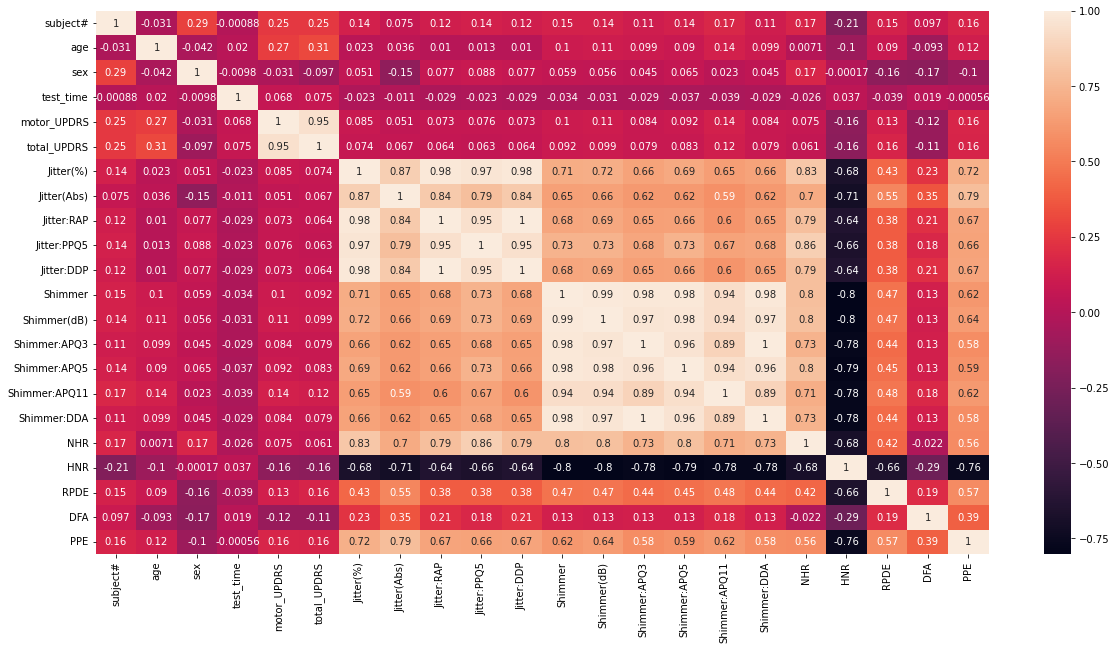

In [ ]:
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True)

In [ ]:
minMaxScaler = MinMaxScaler()
standardScaler = StandardScaler()

In [ ]:
X_cols.append('total_UPDRS')
X_cols.append('motor_UPDRS')

dataset = data[X_cols].copy()

In [ ]:
dataset.columns

Index(['age', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'HNR', 'total_UPDRS', 'motor_UPDRS'],
      dtype='object')

In [ ]:
# data_scaled = pd.DataFrame(standardScaler.fit_transform(dataset), columns=dataset.columns)
features = ['age','Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'HNR']
dataset2 = data[features].copy()

In [ ]:
data_scaled = pd.DataFrame(standardScaler.fit_transform(dataset2), columns=dataset2.columns)

In [ ]:
import joblib

# Save scaler
# joblib.dump(standardScaler, '/work/saved_scalers/svr_scaler_1') 

In [ ]:
pca = PCA()

data_pca = pd.DataFrame(pca.fit_transform(data_scaled))

In [ ]:
# Save pca
# joblib.dump(pca, '/work/saved_scalers/svr_pca_1') 

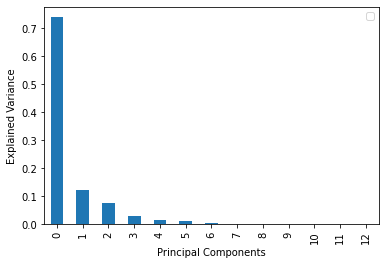

In [ ]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance');

In [ ]:
# X2 = data.loc[:,X_cols].values
X2 = dataset2.loc[:,features].values
y2 = dataset.loc[:,y_cols].values

X2 = standardScaler.fit_transform(X2)

In [ ]:
# Save scaler
# joblib.dump(standardScaler, '/work/saved_scalers/svr_scaler_2') 

In [ ]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(X2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal_component_1', 'principal_component_2','principal_component_3', 'principal_component_4','principal_component_5','principal_component_6', 'principal_component_7'])

In [ ]:
# Save pca
# joblib.dump(pca, '/work/saved_scalers/svr_pca_2') 

In [ ]:
finalDf = pd.concat([principalDf, dataset[y_cols]], axis = 1)
display(finalDf)

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,motor_UPDRS,total_UPDRS
0,-0.465328,0.502185,-0.955887,0.105457,0.136998,-0.545031,0.220205,28.199,34.398
1,-2.104776,-0.214493,-0.806051,0.785908,-0.198034,0.137381,-0.029541,28.447,34.894
2,-1.747673,0.282804,-0.958895,0.005098,0.282127,-0.134851,0.004571,28.695,35.389
3,-1.196095,-0.097399,-0.832938,0.431557,0.045777,0.084340,-0.128917,28.905,35.810
4,-2.271446,-0.142171,-0.856433,0.438470,0.003623,0.313246,-0.063899,29.187,36.375
...,...,...,...,...,...,...,...,...,...
5870,-1.658475,0.285929,0.315334,-0.291163,0.127847,-0.122704,-0.038768,22.485,33.485
5871,-1.659935,-0.141963,0.420412,-0.120788,0.147172,-0.003940,-0.053580,21.988,32.988
5872,-1.450322,-0.138934,0.461694,0.410359,-0.186388,0.002900,-0.076597,21.495,32.495
5873,-2.309406,0.303321,0.310295,0.064903,0.142188,-0.022292,-0.061231,21.007,32.007


In [ ]:
X3 = finalDf.loc[:,'principal_component_1':'principal_component_7']
y3 = finalDf.loc[:,'motor_UPDRS':'total_UPDRS']

In [ ]:
seed = 0
test_size = 0.2

X_train2, X_test2, y_train2, y_test2 = train_test_split(X3, y3, test_size=test_size, random_state=seed)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_train2.shape, y_train2.shape)

(3760, 13) (3760, 2)
(4700, 7) (4700, 2)


## Testing

In [ ]:
def get_metrics2(regressor, target, X_train, y_train, X_test, y_test):
    regressor.fit(X_train, y_train.iloc[:, target]) # 0: motor, 1: total

    if (target == 0):
        print("Motor")
    else:
        print("Total")

    predictions = regressor.predict(X_test)
    print("R2_Score:", r2_score(y_test.iloc[:, target], predictions))
    print("MAE:", mean_absolute_error(y_test.iloc[:, target], predictions))
    print("MSE:", mean_squared_error(y_test.iloc[:, target], predictions))
    print("RMSE:", mean_squared_error(y_test.iloc[:, target], predictions, squared=False))

    return regressor

    print("\n")

## Split data by sex

In [ ]:
male = data[data['sex'] == 0]
female = data[data['sex'] == 1]

In [ ]:
scaler = StandardScaler()

df = data[X_cols].copy()
scaler=scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaler, columns=df.columns)
sex = data['sex']
df_scaled.join(sex)
df_scaled.head(5)

,age,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,HNR,total_UPDRS,motor_UPDRS
0,0.815695,0.082905,-0.284242,0.327453,-0.028637,0.328505,-0.324594,-0.351642,-0.209709,-0.423356,-0.543466,-0.209704,-0.009205,0.502745,0.849197
1,0.815695,-0.560793,-0.756723,-0.533746,-0.476212,-0.534825,-0.534016,-0.573156,-0.545158,-0.565592,-0.529955,-0.545153,1.282650,0.549103,0.879706
2,0.815695,-0.238944,-0.539382,-0.300038,-0.320767,-0.298983,-0.669115,-0.564469,-0.741592,-0.702426,-0.645545,-0.741587,0.318711,0.595367,0.910216
3,0.815695,-0.155370,-0.485186,-0.344859,-0.170682,-0.344871,-0.423692,0.069668,-0.460540,-0.449763,-0.392849,-0.460787,0.644530,0.634716,0.936051
4,0.815695,-0.498557,-0.663894,-0.658604,-0.529814,-0.659682,-0.658276,-0.586186,-0.783145,-0.651413,-0.464905,-0.783392,1.036305,0.687522,0.970743


## Models

In [ ]:
regressor_male_motor = SVR(kernel='rbf', gamma=0.6)
regressor_male_total = SVR(kernel='rbf', gamma=0.6)
regressor_female_motor = SVR(kernel='rbf', gamma=0.6)
regressor_female_total = SVR(kernel='rbf', gamma=0.6)

### Male

In [ ]:
scaler_m = StandardScaler()

X_m = male.loc[:,features].values
y_m = male.loc[:,y_cols].values

print(X_m)
X_m = scaler_m.fit_transform(X2)

[[7.2000e+01 6.6200e-03 3.3800e-05 ... 1.6620e-02 4.3140e-02 2.1640e+01]
 [7.2000e+01 3.0000e-03 1.6800e-05 ... 1.6890e-02 2.9820e-02 2.7183e+01]
 [7.2000e+01 4.8100e-03 2.4620e-05 ... 1.4580e-02 2.2020e-02 2.3047e+01]
 ...
 [6.1000e+01 3.4900e-03 2.4700e-05 ... 1.8770e-02 4.1120e-02 2.5065e+01]
 [6.1000e+01 2.8100e-03 2.0340e-05 ... 1.3070e-02 2.0780e-02 2.4422e+01]
 [6.1000e+01 2.8200e-03 2.1100e-05 ... 1.4700e-02 2.8390e-02 2.3259e+01]]


In [ ]:
pca = PCA(n_components=7)
principalComponents_m = pca.fit_transform(X_m)
principalDf_m = pd.DataFrame(data = principalComponents_m
             , columns = ['principal_component_1', 'principal_component_2','principal_component_3', 'principal_component_4','principal_component_5','principal_component_6', 'principal_component_7'])

In [ ]:
# Save scaler
# joblib.dump(scaler_m, '/work/saved_scalers/svr_scaler_male') 
# joblib.dump(pca, '/work/saved_scalers/svr_pca_male') 

In [ ]:
finalDf_m = pd.concat([principalDf_m, data[y_cols]], axis = 1)
X3_m = finalDf_m.loc[:,'principal_component_1':'principal_component_7']
y3_m = finalDf_m.loc[:,'motor_UPDRS':'total_UPDRS']

seed=0
test_size=0.2

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X3_m, y3_m, test_size=test_size, random_state=seed)

In [ ]:
get_metrics2(regressor_male_motor, 0, X_train_m, y_train_m, X_test_m, y_test_m)
get_metrics2(regressor_male_total, 1, X_train_m, y_train_m, X_test_m, y_test_m)

Motor
R2_Score: 0.32460518507310077
MAE: 5.142192157113672
MSE: 44.126362558091415
RMSE: 6.642767688101957
Total
R2_Score: 0.2958238506951
MAE: 6.707986152128333
MSE: 78.49039357312655
RMSE: 8.859480434716618


SVR(gamma=0.6)

### Female

In [ ]:
scaler_f = StandardScaler()

X_f = female.loc[:,features].values
y_f = female.loc[:,y_cols].values

X_f = scaler_f.fit_transform(X2)

In [ ]:
pca = PCA(n_components=7)
principalComponents_f = pca.fit_transform(X_f)
principalDf_f = pd.DataFrame(data = principalComponents_f
             , columns = ['principal_component_1', 'principal_component_2','principal_component_3', 'principal_component_4','principal_component_5','principal_component_6', 'principal_component_7'])

In [ ]:
# Save scaler
# joblib.dump(scaler_f, '/work/saved_scalers/svr_scaler_female') 
# joblib.dump(pca, '/work/saved_scalers/svr_pca_female') 

In [ ]:
finalDf_f = pd.concat([principalDf_f, data[y_cols]], axis = 1)
X3_f = finalDf_f.loc[:,'principal_component_1':'principal_component_7']
y3_f = finalDf_f.loc[:,'motor_UPDRS':'total_UPDRS']

seed=0
test_size=0.2

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X3_f, y3_f, test_size=test_size, random_state=seed)

In [ ]:
get_metrics2(regressor_female_motor, 0, X_train_f, y_train_f, X_test_f, y_test_f)
get_metrics2(regressor_female_total, 1, X_train_f, y_train_f, X_test_f, y_test_f)

Motor
R2_Score: 0.3246051850731009
MAE: 5.142192157113669
MSE: 44.12636255809141
RMSE: 6.642767688101956
Total
R2_Score: 0.2958238506951
MAE: 6.707986152128332
MSE: 78.49039357312655
RMSE: 8.859480434716618


SVR(gamma=0.6)

In [ ]:
# Save models
# !mkdir -p ../saved_models
# joblib.dump(regressor_male_motor, '/work/saved_models/svr_male_motor')
# joblib.dump(regressor_male_total, '/work/saved_models/svr_male_total')
# joblib.dump(regressor_female_motor, '/work/saved_models/svr_female_motor')
# joblib.dump(regressor_female_total, '/work/saved_models/svr_female_total')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a3b4f5ce-96b0-4815-84e4-80dc6a795abb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>